# Markit Manufacturing PMI

Markit Manufacturing PMI is an indicator of changes in business conditions in the US manufacturing sector in the specified month. The indicator is based on monthly surveys of purchasing managers working in private companies of the manufacturing sector.

Often purchasing managers can track changes in market conditions prior to other company employees, because purchases precede company's production activities. Purchasing managers are among the first to notice such changes. The sample for the survey are chosen so as to cover the maximum possible number of large companies across the country.

Unlike the PMI published by ISM, Markit PMI only includes information from private companies. Purchasing managers fill in questionnaire, in which they characterize the main parameters of their work:

Output
New orders
Backlogs
Price paid (for materials, services and goods purchased in the production process)
Prices received
Suppliers' delivery times
Inventories
Employment
Future output
Respondents are asked to provide a relative estimate, showing whether the above parameters have improved, deteriorated or have not changed. Individual subindexes are calculated based on these answers. These subindexes characterize inflation, employment and other key indicators of economic activity. The index is seasonally adjusted. Individual weights are given to polled companies. Readings above 50 indicate that most of respondents positively characterize current business conditions. Readings below 50 mean worsening of business conditions.

PMI is one of the most popular indexes closely watched by analysts. It provides operational information covering the entire manufacturing sector. It is interpreted as a leading indicator of production and inflation. Manufacturing PMI growth is an indication of favorable market conditions and can be seen as positive for the US dollar.

## Source

- https://www.mql5.com/en/economic-calendar/united-states/markit-manufacturing-pmi

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Markit-Manufacturing-PMI" data-toc-modified-id="Markit-Manufacturing-PMI-1">Markit Manufacturing PMI</a></span><ul class="toc-item"><li><span><a href="#Source" data-toc-modified-id="Source-1.1">Source</a></span></li></ul></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2">Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Describe-Data" data-toc-modified-id="Describe-Data-3.1">Describe Data</a></span></li><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.2">Sample the data</a></span></li></ul></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-4">Rata Die</a></span></li><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-5">Draw Plots</a></span></li><li><span><a href="#Extract-only-the-desired-data" data-toc-modified-id="Extract-only-the-desired-data-6">Extract only the desired data</a></span></li><li><span><a href="#Quantize-(normalize)-the-data" data-toc-modified-id="Quantize-(normalize)-the-data-7">Quantize (normalize) the data</a></span></li><li><span><a href="#Fill-Empty-Dates" data-toc-modified-id="Fill-Empty-Dates-8">Fill Empty Dates</a></span><ul class="toc-item"><li><span><a href="#Insert-missing-values" data-toc-modified-id="Insert-missing-values-8.1">Insert missing values</a></span></li></ul></li><li><span><a href="#Averages" data-toc-modified-id="Averages-9">Averages</a></span><ul class="toc-item"><li><span><a href="#Insert-averages-to-DataFrame" data-toc-modified-id="Insert-averages-to-DataFrame-9.1">Insert averages to DataFrame</a></span></li></ul></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-10">Save DataFrame to CSV file</a></span></li></ul></div>

# Set Up

In [1]:
show_help = false
include("MarketIndicators.jl") 
println()

# Read Data

In [2]:
# data = available_datasets() # uncomment to see all available datasets

dataset_file_name = "united-states.ism-manufacturing-pmi.csv"
df = fetch_dataset(dataset_file_name, "yyyy.mm.dd")
record_count = size(df)[1]
println("data dimentions: ", size(df) )

data dimentions: (164, 4)


## Describe Data

In [3]:
using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Date,,2007-03-01,,2020-10-01,164,,Date
2,ActualValue,52.8652,32.4,53.1,61.4,,,Float64
3,ForecastValue,54.539,47.5,54.1,62.7,,123,"Union{Missing, Float64}"
4,PreviousValue,52.8589,32.4,53.2,61.4,,1,"Union{Missing, Float64}"


## Sample the data

In [4]:
columns = preview_data(df) # uncomment to see the data
println()

12×4 DataFrame
│ Row │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Date       │ Float64     │ Float64?      │ Float64?      │
├─────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 2007-03-01 │ 52.3        │ missing       │ missing       │
│ 2   │ 2008-05-01 │ 48.6        │ missing       │ 48.6          │
│ 3   │ 2009-07-01 │ 44.8        │ missing       │ 42.8          │
│ 4   │ 2010-09-01 │ 56.3        │ missing       │ 55.5          │
│ 5   │ 2011-11-01 │ 51.8        │ missing       │ 52.5          │
│ 6   │ 2013-01-02 │ 50.2        │ missing       │ 49.5          │
│ 7   │ 2014-03-03 │ 53.2        │ missing       │ 51.3          │
│ 8   │ 2015-05-01 │ 51.5        │ missing       │ 51.5          │
│ 9   │ 2016-07-01 │ 53.2        │ missing       │ 51.3          │
│ 10  │ 2017-09-01 │ 58.8        │ 57.4          │ 56.3          │
│ 11  │ 2018-11-01 │ 57.7        │ 60.6          │ 59.8          │
│ 12  │ 2020-01-03 │ 47.2        │ 48.3        

# Rata Die

In [5]:
insert!(df, 1, zeros(Int64, record_count), :Rata_Die)
update_rata_die!(df, 1, 2)
first(df, 6)

,Rata_Die,Date,ActualValue,ForecastValue,PreviousValue
,Int64,Date,Float64,Float64?,Float64?
1,732736,2007-03-01,52.3,missing,missing
2,732768,2007-04-02,50.9,missing,52.3
3,732797,2007-05-01,54.7,missing,50.9
4,732828,2007-06-01,55.0,missing,54.7
5,732859,2007-07-02,56.0,missing,55.0
6,732889,2007-08-01,53.8,missing,56.0


In [6]:
columns = preview_data(df)
println()

12×5 DataFrame
│ Row │ Rata_Die │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Int64    │ Date       │ Float64     │ Float64?      │ Float64?      │
├─────┼──────────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 732736   │ 2007-03-01 │ 52.3        │ missing       │ missing       │
│ 2   │ 733163   │ 2008-05-01 │ 48.6        │ missing       │ 48.6          │
│ 3   │ 733589   │ 2009-07-01 │ 44.8        │ missing       │ 42.8          │
│ 4   │ 734016   │ 2010-09-01 │ 56.3        │ missing       │ 55.5          │
│ 5   │ 734442   │ 2011-11-01 │ 51.8        │ missing       │ 52.5          │
│ 6   │ 734870   │ 2013-01-02 │ 50.2        │ missing       │ 49.5          │
│ 7   │ 735295   │ 2014-03-03 │ 53.2        │ missing       │ 51.3          │
│ 8   │ 735719   │ 2015-05-01 │ 51.5        │ missing       │ 51.5          │
│ 9   │ 736146   │ 2016-07-01 │ 53.2        │ missing       │ 51.3          │
│ 10  │ 736573   │ 2017-09-01 │ 58.8        │ 57.

# Draw Plots

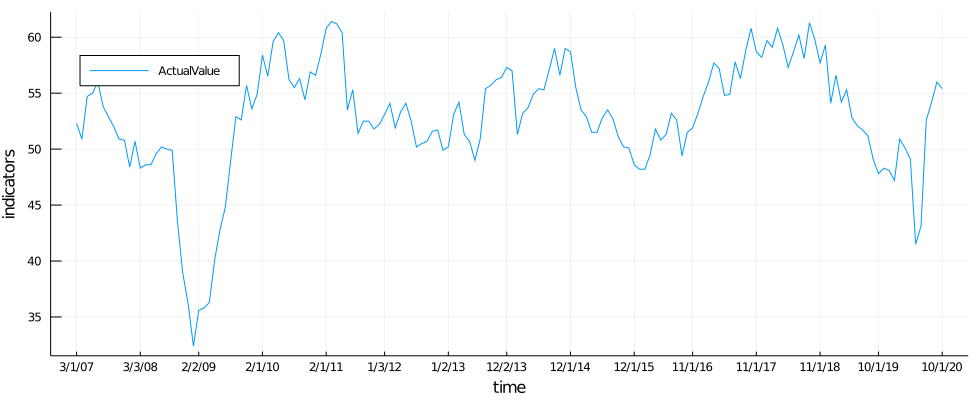

In [7]:
using Plots

record_count = size(df)[1]
rows = 1:record_count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3]   "" ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Extract only the desired data

In [8]:
using DataFrames
df = DataFrame( Day = df[:,1], 
                Date = df[:,2],
                Value = df[:,3]
               )

columns = preview_data(df)
println()

12×3 DataFrame
│ Row │ Day    │ Date       │ Value   │
│     │ Int64  │ Date       │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 732736 │ 2007-03-01 │ 52.3    │
│ 2   │ 733163 │ 2008-05-01 │ 48.6    │
│ 3   │ 733589 │ 2009-07-01 │ 44.8    │
│ 4   │ 734016 │ 2010-09-01 │ 56.3    │
│ 5   │ 734442 │ 2011-11-01 │ 51.8    │
│ 6   │ 734870 │ 2013-01-02 │ 50.2    │
│ 7   │ 735295 │ 2014-03-03 │ 53.2    │
│ 8   │ 735719 │ 2015-05-01 │ 51.5    │
│ 9   │ 736146 │ 2016-07-01 │ 53.2    │
│ 10  │ 736573 │ 2017-09-01 │ 58.8    │
│ 11  │ 736999 │ 2018-11-01 │ 57.7    │
│ 12  │ 737427 │ 2020-01-03 │ 47.2    │
 Dataset dimentions: (164, 3)

 Column numbering:
1 Day
2 Date
3 Value



# Quantize (normalize) the data

In [9]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df, 3)

columns = preview_data(df)
println()

bias for 0 value: -1.1172413793103448
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = 32.4
maximum = 61.4
Save these values for later to run model preditions
12×3 DataFrame
│ Row │ Day    │ Date       │ Value   │
│     │ Int64  │ Date       │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 732736 │ 2007-03-01 │ 47.0    │
│ 2   │ 733163 │ 2008-05-01 │ 14.0    │
│ 3   │ 733589 │ 2009-07-01 │ -19.0   │
│ 4   │ 734016 │ 2010-09-01 │ 82.0    │
│ 5   │ 734442 │ 2011-11-01 │ 43.0    │
│ 6   │ 734870 │ 2013-01-02 │ 29.0    │
│ 7   │ 735295 │ 2014-03-03 │ 55.0    │
│ 8   │ 735719 │ 2015-05-01 │ 40.0    │
│ 9   │ 736146 │ 2016-07-01 │ 55.0    │
│ 10  │ 736573 │ 2017-09-01 │ 104.0   │
│ 11  │ 736999 │ 2018-11-01 │ 94.0    │
│ 12  │ 737427 │ 2020-01-03 │ 2.0     │
 Dataset dimentions: (164, 3)

 Column numbering:
1 Day
2 Date
3 Value



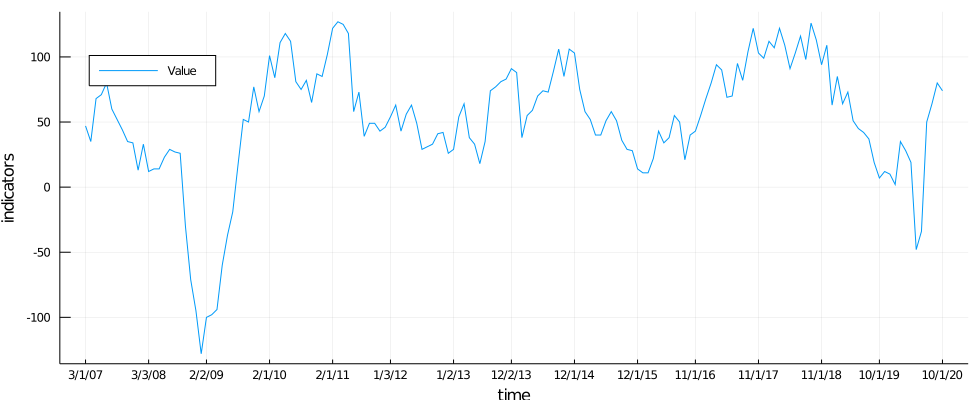

In [10]:
using Plots

count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3] ""   ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Fill Empty Dates

## Insert missing values

In [11]:
for i in 1:count-1
    day_this = df[i,1]
    day_next = df[i+1,1]
    
    value = df[i,3] # assuming that the last known value is still valid
    
    # loop thru all days you need to insert
    # if there is no gap, nothing will happen
    for day in day_this+1:day_next-1
        #date_string = Dates.format(rata2datetime(day), "yyyy-mm-dd")
        push!(df, [ day rata2datetime(day) value ])
    end
    
end

sort!(df, [:Day]);
count = size(df)[1]
columns = preview_data(df)
println()

12×3 DataFrame
│ Row │ Day    │ Date       │ Value   │
│     │ Int64  │ Date       │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 732736 │ 2007-03-01 │ 47.0    │
│ 2   │ 733150 │ 2008-04-18 │ 14.0    │
│ 3   │ 733564 │ 2009-06-06 │ -37.0   │
│ 4   │ 733978 │ 2010-07-25 │ 81.0    │
│ 5   │ 734392 │ 2011-09-12 │ 49.0    │
│ 6   │ 734806 │ 2012-10-30 │ 41.0    │
│ 7   │ 735220 │ 2013-12-18 │ 91.0    │
│ 8   │ 735634 │ 2015-02-05 │ 58.0    │
│ 9   │ 736048 │ 2016-03-25 │ 22.0    │
│ 10  │ 736462 │ 2017-05-13 │ 69.0    │
│ 11  │ 736876 │ 2018-07-01 │ 103.0   │
│ 12  │ 737290 │ 2019-08-19 │ 37.0    │
 Dataset dimentions: (4964, 3)

 Column numbering:
1 Day
2 Date
3 Value



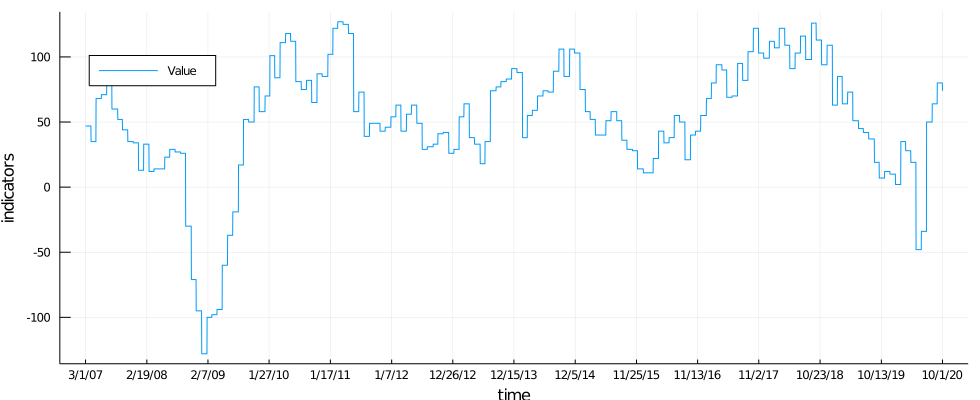

In [12]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [ columns[3]    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Averages

In [13]:
averages365 = calculate_average(df, 365, 3)
println()

## Insert averages to DataFrame

In [14]:
insertcols!(df, :Avg365 => averages365, makeunique=true)
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Day,735218.0,732736,735218.0,737699,,,Int64
2,Date,,2007-03-01,,2020-10-01,4964,,Date
3,Value,51.7921,-128.0,54.0,127.0,,,Float64
4,Avg365,48.8337,-57.18,51.295,108.68,,,Float64


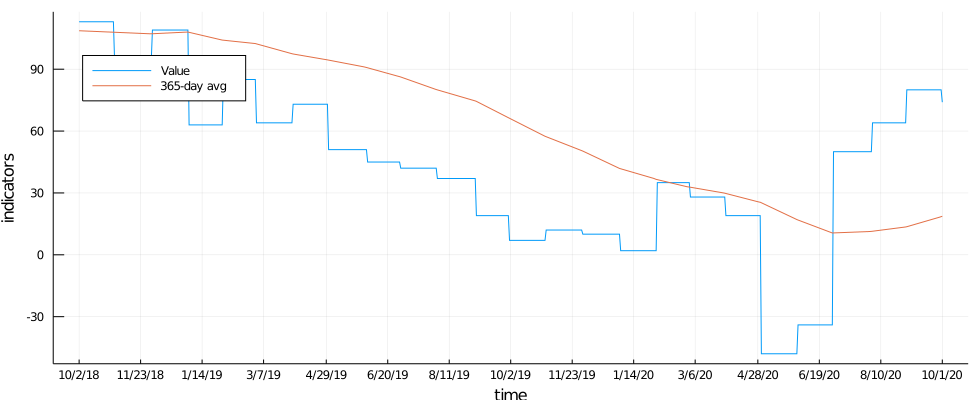

In [15]:
using Plots
count = size(df)[1]
rows = count-730:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows, 3] df[rows, 4]    ], # y-axis
    label    = [ "Value" "365-day avg"    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

[back to top](#Table-of-Contents)
<hr/>

# Save DataFrame to CSV file

In [16]:
save_dataset(df, dataset_file_name);